# Esercitazione Solar Panel

## import librerie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib as ptlt
import plotly.express as px
%matplotlib inline
import plotly.graph_objs as go

## lettura da csv

In [3]:
df_solar_panel=pd.read_csv("solar_panels.csv",sep=";")
df_solar_panel["DaySum"]=pd.to_numeric(df_solar_panel["DaySum"])

# Es 1

Analisi della produzione energetica
1) Determinare e graficare la produzione energetica totale (kWh) raggruppata nei seguenti intervalli temporali:
* Giornaliera
* Settimanale
* Mensile
* Stagionale
* Totale annuale
2) Il consumo medio di una famiglia di 4 persone è di 2.7MWh annui, guardando il totale annuale l’impianto in
questione è sufficiente?
3) Sempre guardando il totale annuale e considerando un costo medio di 0.35€/kWh per l’energia acquistata da un
fornitore, quanti soldi vengono risparmiati? Se l’eventuale energia surplus venisse rivenduta a 0.05€/kWh, quanti
soldi verrebbero guadagnati?
4) Assumendo che il consumo energetico sia ogni giorno lo stesso (dividere il totale per 365), quanti giorni l’impianto
ha fornito energia sufficiente a coprire il fabbisogno? Bonus: graficare il guadagno cumulato giorno per giorno
dovuto alla rivendita dell’energia in eccesso.
5) Si consideri ora che il proprietario possieda due Tesla Model S che percorrono all’anno 15000km ciascuna, con un
consumo di 180Wh al kilometro e ricaricate sempre a casa. Ripetere i punti 2), 3) e 4) considerando il fabbisogno
delle auto elettriche.

## 1) Determinare e graficare la produzione energetica totale (kWh) raggruppata in intervalli temporali

### Produzione energetica giornaliera

In [4]:
df_kwh_giorno=df_solar_panel.set_index("Date")
df_kwh_giorno.index=pd.to_datetime(df_kwh_giorno.index)
df_kwh_giorno=pd.DataFrame(df_kwh_giorno.resample("D").max()["DaySum"]/1000)
len(df_kwh_giorno)

365

In [5]:
px.bar(df_kwh_giorno,
       y="DaySum",
       template='plotly_white',
       labels={"DaySum":"Somma kW/h","index":"Tempo (giorni)"},
       title="Produzione energetica totale giornaliera")

In [6]:
df_kwh_giorno["Date"]=pd.to_datetime(df_kwh_giorno.index)

### Produzione energetica settimanale

In [7]:
df_kwh_settimana=df_kwh_giorno.resample("W").sum()

In [8]:
fig = px.bar(df_kwh_settimana,
             y="DaySum",
             template='plotly_white',
             labels={"DaySum":"Somma kW/h","week":"Settimane"},
             color_discrete_sequence=["green"],
             title="Produzione energetica totale settimanale")
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in df_kwh_settimana.index]
    )
)
fig.show()

### Produzione energetica mensile

In [9]:
df_kwh_mese = df_kwh_giorno.resample("M").sum()

In [10]:
fig = px.bar(df_kwh_mese,
             y="DaySum",
             template='plotly_white',
             labels={"DaySum":"Somma kW/h","Date":"Mesi"},
             color_discrete_sequence=["orange"],
             title="Produzione energetica totale mensile")
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in df_kwh_mese.index],
        ticktext = ["Gen","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    )
)
fig.show()

### Produzione energetica stagionale e totale

In [11]:
df_kwh_stagioni = pd.DataFrame(index=["Primavera","Estate","Autunno","Inverno"],columns=["DaySum"]).fillna(0)
inizio_primavera = pd.to_datetime("2015-03-21")
inizio_estate = pd.to_datetime("2015-06-21")
inizio_autunno = pd.to_datetime("2015-09-22")
inizio_inverno = pd.to_datetime("2015-12-22")

In [12]:
kwh_totale = df_kwh_giorno.sum().squeeze()

C:\Users\Utente\AppData\Local\Temp/ipykernel_4292/328433120.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [13]:
df_kwh_stagioni.loc["Primavera","DaySum"] = sum(df_kwh_giorno[(df_kwh_giorno.index>=inizio_primavera) & (df_kwh_giorno.index<inizio_estate)].DaySum)
df_kwh_stagioni.loc["Estate","DaySum"] = sum(df_kwh_giorno[(df_kwh_giorno.index>=inizio_estate) & (df_kwh_giorno.index<inizio_autunno)].DaySum)
df_kwh_stagioni.loc["Autunno","DaySum"] = sum(df_kwh_giorno[(df_kwh_giorno.index>=inizio_autunno) & (df_kwh_giorno.index<inizio_inverno)].DaySum)
df_kwh_stagioni.loc["Inverno","DaySum"] = kwh_totale - sum(df_kwh_stagioni.DaySum)

In [14]:
fig = px.bar(df_kwh_stagioni,
             y="DaySum",
             template='plotly_white',
             labels={"DaySum":"Somma kW/h","index":"Stagioni"},
             color_discrete_sequence=["purple"],
             title="Produzione energetica totale stagionale",
             width=700,
             height=400,)
for data in fig.data:
    data["width"] =0.5
fig.show()

In [15]:
fig = px.bar(df_kwh_stagioni.transpose(),
             template='plotly_white',
             labels={"value":"kW/H","index":"", "variable":"Stagioni"},
             color_discrete_sequence= px.colors.qualitative.Plotly,
             title="Produzione energetica totale",
             width=600,
             height=500,
             barmode = "stack")
fig.update_xaxes(showticklabels=False)
for data in fig.data:
    data["width"] =0.4
fig.show()

In [16]:
px.pie(df_kwh_stagioni,  
        values='DaySum', 
        names=df_kwh_stagioni.index,
        title=f"Influenza delle stagioni sull'energia prodotta ({int(kwh_totale)} kw/H)",
        width=600,
        height=500,)

## 3) Soldi risparmiati e soldi guadagnati

### Risparmio energetico
3) Sempre guardando il totale annuale e considerando un costo medio di 0.35€/kWh per l’energia acquistata da un 
fornitore, quanti soldi vengono risparmiati? Se l’eventuale energia surplus venisse rivenduta a 0.05€/kWh, quanti 
soldi verrebbero guadagnati?

In [17]:
risparmio = kwh_totale * 0.35
risparmio = round(risparmio, 2)
risparmio

2821.73

### Guadagno dall'energia in eccesso

In [18]:
guadagno = (kwh_totale - 2700) * 0.05
guadagno = round(guadagno, 2)
guadagno

268.1

## 4) Quando l'impianto riesce a soddisfare il fabbisogno della famiglia?
4) Assumendo che il consumo energetico sia ogni giorno lo stesso (dividere il totale per 365), quanti giorni l’impianto 
ha fornito energia sufficiente a coprire il fabbisogno? Bonus: graficare il guadagno cumulato giorno per giorno 
dovuto alla rivendita dell’energia in eccesso.

In [19]:
fabb_med_giornaliero = 2700 /365
fig = px.bar(df_kwh_giorno,
       y="DaySum",
       template='plotly_white',
       labels={"DaySum":"Somma kW/h","index":"Tempo (giorni)"},
       title="Produzione energetica totale giornaliera")
fig.add_hline(y=fabb_med_giornaliero,opacity=0.5, line_color="red")
fig.show()

### Grafico comulativo

In [20]:
df_guadagno_giornaliero = df_kwh_giorno.copy()
df_guadagno_giornaliero["Energia_Guadagnata"] = (df_guadagno_giornaliero["DaySum"] - fabb_med_giornaliero)

In [21]:
df_guadagno_giornaliero["Guadagno"]=0
df_guadagno_giornaliero.loc[df_guadagno_giornaliero["Energia_Guadagnata"] > 0, "Guadagno"] = df_guadagno_giornaliero["Energia_Guadagnata"]*0.05

df_guadagno_giornaliero["Spesa"]=0
df_guadagno_giornaliero.loc[df_guadagno_giornaliero["Energia_Guadagnata"] < 0, "Spesa"] = df_guadagno_giornaliero["Energia_Guadagnata"]*-0.35

df_guadagno_giornaliero["Ricavo"] = df_guadagno_giornaliero["Guadagno"] - df_guadagno_giornaliero["Spesa"]


df_guadagno_giornaliero["Color"] = ["Green" if x>0 else "Red" for x in df_guadagno_giornaliero["Ricavo"]]
df_guadagno_giornaliero

,DaySum,Date,Energia_Guadagnata,Guadagno,Spesa,Ricavo,Color
Date,,,,,,,
2015-01-01,12.204,2015-01-01,4.80674,0.240337,0.000000,0.240337,Green
2015-01-02,11.447,2015-01-02,4.04974,0.202487,0.000000,0.202487,Green
2015-01-03,18.222,2015-01-03,10.82474,0.541237,0.000000,0.541237,Green
2015-01-04,37.805,2015-01-04,30.40774,1.520387,0.000000,1.520387,Green
2015-01-05,5.912,2015-01-05,-1.48526,0.000000,0.519841,-0.519841,Red
...,...,...,...,...,...,...,...
2015-12-27,1.727,2015-12-27,-5.67026,0.000000,1.984591,-1.984591,Red
2015-12-28,2.495,2015-12-28,-4.90226,0.000000,1.715791,-1.715791,Red
2015-12-29,3.985,2015-12-29,-3.41226,0.000000,1.194291,-1.194291,Red


In [22]:
num_giorni_guadagno = len(df_guadagno_giornaliero[df_guadagno_giornaliero["Guadagno"] > 0])
num_giorni_guadagno

308

In [23]:
df_guadagno_giornaliero_cumulativo = pd.DataFrame(df_guadagno_giornaliero["Guadagno"].cumsum())
fig = px.line(df_guadagno_giornaliero_cumulativo,
        template='plotly_white',
        labels={"value":"Guadagno (€)","Date":"Tempo"},
        title="Guadagno cumulativo giornaliero",
        width=1000,
        height=700)

fig.update_layout(showlegend=False)
fig.show()

In [24]:
fig = px.bar(df_guadagno_giornaliero, y = "Ricavo", 
     template='plotly_white',
       labels={"index":"Tempo (giorni)","Ricavo":"Ricavo (€)"},
       title="Ricavo giornaliero",
       color = "Color",color_discrete_sequence=df_guadagno_giornaliero.Color.unique(),
       width=1400,
       height=450)

fig.update_layout(showlegend=False)
fig.show()

## 5) Ora il proprietario ha 2 Tesla, ricalcola tutto

### 2) Soldi risparmiati e soldi guadagnati

#### Consumo energetico
-5) Si consideri ora che il proprietario possieda due Tesla Model S che percorrono all’anno 15000km ciascuna, con un 
consumo di 180Wh al kilometro e ricaricate sempre a casa. Ripetere i punti 2), 3) e 4) considerando il fabbisogno 
delle auto elettriche

In [25]:
consumo_tesla_annuo = 15000*180/1000*2
fabb_med_giornaliero_con_tesla = (consumo_tesla_annuo+2700)/365

#### Guadagno dall'energia in eccesso

Non ho eseguito il risparmio considerando come è stato precedentemente eseguito

In [26]:
guadagno = (kwh_totale - (2700+consumo_tesla_annuo)) * 0.05
guadagno = round(guadagno, 2)
guadagno

-1.9

### 4) Quando l'impianto riesce a soddisfare il fabbisogno della famiglia?

In [27]:
fig = px.bar(df_kwh_giorno,
       y="DaySum",
       template='plotly_white',
       labels={"DaySum":"Somma kW/h","index":"Tempo (giorni)"},
       title="Produzione energetica totale giornaliera")
fig.add_hline(y=fabb_med_giornaliero_con_tesla,opacity=0.5, line_color="red")
fig.show()

#### Grafico comulativo

In [28]:
df_guadagno_giornaliero_con_tesla = df_kwh_giorno.copy()
df_guadagno_giornaliero_con_tesla["Energia_Guadagnata"] = (df_guadagno_giornaliero_con_tesla["DaySum"] - fabb_med_giornaliero_con_tesla)

In [29]:
df_guadagno_giornaliero_con_tesla["Guadagno"]=0
df_guadagno_giornaliero_con_tesla.loc[df_guadagno_giornaliero_con_tesla["Energia_Guadagnata"] > 0, "Guadagno"] = df_guadagno_giornaliero_con_tesla["Energia_Guadagnata"]*0.05

df_guadagno_giornaliero_con_tesla["Spesa"]=0
df_guadagno_giornaliero_con_tesla.loc[df_guadagno_giornaliero_con_tesla["Energia_Guadagnata"] < 0, "Spesa"] = df_guadagno_giornaliero_con_tesla["Energia_Guadagnata"]*-0.35

df_guadagno_giornaliero_con_tesla["Ricavo"] = df_guadagno_giornaliero_con_tesla["Guadagno"] - df_guadagno_giornaliero_con_tesla["Spesa"]


df_guadagno_giornaliero_con_tesla["Color"] = ["Green" if x>0 else "Red" for x in df_guadagno_giornaliero_con_tesla["Ricavo"]]
df_guadagno_giornaliero_con_tesla

,DaySum,Date,Energia_Guadagnata,Guadagno,Spesa,Ricavo,Color
Date,,,,,,,
2015-01-01,12.204,2015-01-01,-9.987781,0.000000,3.495723,-3.495723,Red
2015-01-02,11.447,2015-01-02,-10.744781,0.000000,3.760673,-3.760673,Red
2015-01-03,18.222,2015-01-03,-3.969781,0.000000,1.389423,-1.389423,Red
2015-01-04,37.805,2015-01-04,15.613219,0.780661,0.000000,0.780661,Green
2015-01-05,5.912,2015-01-05,-16.279781,0.000000,5.697923,-5.697923,Red
...,...,...,...,...,...,...,...
2015-12-27,1.727,2015-12-27,-20.464781,0.000000,7.162673,-7.162673,Red
2015-12-28,2.495,2015-12-28,-19.696781,0.000000,6.893873,-6.893873,Red
2015-12-29,3.985,2015-12-29,-18.206781,0.000000,6.372373,-6.372373,Red


In [30]:
num_giorni_guadagno_con_tesla = len(df_guadagno_giornaliero_con_tesla[df_guadagno_giornaliero_con_tesla["Guadagno"] > 0])
num_giorni_guadagno_con_tesla

193

In [31]:
df_guadagno_giornaliero_cumulativo_con_tesla = pd.DataFrame(df_guadagno_giornaliero_con_tesla["Guadagno"].cumsum())
fig = px.line(df_guadagno_giornaliero_cumulativo_con_tesla,
        template='plotly_white',
        labels={"value":"Guadagno (€)","Date":"Tempo"},
        title="Guadagno cumulativo giornaliero",
        width=1000,
        height=700)

fig.update_layout(showlegend=False)
fig.show()

In [32]:
fig = px.bar(df_guadagno_giornaliero_con_tesla, y = "Ricavo", 
     template='plotly_white',
       labels={"index":"Tempo (giorni)","Ricavo":"Ricavo (€)"},
       title="Ricavo giornaliero",
       color = "Color",color_discrete_sequence=df_guadagno_giornaliero_con_tesla.Color.unique(),
       width=1400,
       height=450)

fig.update_layout(showlegend=False)
fig.show()

### quanto spende all'anno di corrente?

In [33]:
df_guadagno_giornaliero_con_tesla.Ricavo.sum()

-584.0781404109589

# es 2

Si vuole ora analizzare la potenza utile erogata dall’impianto (Pac). <br>
1) Graficare:
* i 10 giorni in cui si sono raggiunte le 10 Pac massime, ordinati decrescenti;
* i mesi ordinati dalla maggiore Pac raggiunta;
* le stagioni ordinate dalla maggiore Pac raggiunta;
2) Graficare la Pac media e massima per il ‘giorno medio’ dell’anno (raggruppamento per tempo). In quale orario si ha in
media la maggior potenza erogata dall’impianto?
3) Graficare la Pac rispetto alla temperatura; ritieni vi sia una correlazione? in media a quale temperatura si ha la
massima produzione? Bonus: rappresentare il grafico della Pac media con le barre degli errori.
4) Considerando che l’energia in kWh si ottiene moltiplicando la potenza in kW per un’ora, calcolare l’energia totale
prodotta nell’anno usando la Pac e confrontarla poi con il totale dato dalla colonna DaySum.
5) Graficare l’energia prodotta cumulata e puntuale rispetto ai giorni dell’anno utilizzando la Pac.


In [115]:
df_pac_day=df_solar_panel.set_index("Date")
df_pac_day.index=pd.to_datetime(df_pac_day.index)
df_pac_day=pd.DataFrame(df_pac_day.resample("D").max()["Pac"])
df_pac_day.sort_values("Pac",ascending=False,inplace=True)
df_pac_day.head(10)

,Pac
Date,
2015-06-18,5948
2015-06-21,5938
2015-05-27,5918
2015-06-16,5893
2015-06-20,5848
2015-05-28,5787
2015-06-15,5728
2015-02-23,5673
2015-04-29,5666


In [93]:
df_pac_day_plot=df_pac_day.copy()
df_pac_day_plot.index=df_pac_day.index.strftime("%Y-%m-%d")

In [109]:
fig = px.bar(df_pac_day_plot.head(10),
       y="Pac",
       template='plotly_white',
       labels={"Pac":"Pac kW/h","index":"Tempo (giorni)"},
       title="Pac massimi per i primi 10 giorni")

fig.update_layout(
    xaxis = {"type":"category"}
)

for data in fig.data:
    data["width"] =0.6

fig.show()

In [55]:
df_pac_month=df_pac_day.resample("M").max().sort_values("Pac",ascending=False)

In [75]:
df_pac_month_plot=df_pac_month.copy()
df_pac_month_plot.index=df_pac_month.index.month_name()

In [106]:
fig = px.bar(df_pac_month,
             y="Pac",
             template='plotly_white',
             labels={"Pac":"Pac W/H","Date":"Mesi"},
             color_discrete_sequence=["green"],
             title="Pac massimi per ogni mese")
             
for data in fig.data:
    data["width"] =0.6

fig.show()

In [110]:
df_pac_season = pd.DataFrame(index=["Primavera","Estate","Autunno","Inverno"],columns=["Pac"]).fillna(0)

In [129]:
df_pac_season.loc["Primavera","Pac"] = max(df_pac_day[(df_pac_day.index>=inizio_primavera) & (df_pac_day.index<inizio_estate)].Pac)
df_pac_season.loc["Estate","Pac"] = max(df_pac_day[(df_pac_day.index>=inizio_estate) & (df_pac_day.index<inizio_autunno)].Pac)
df_pac_season.loc["Autunno","Pac"] = max(df_pac_day[(df_pac_day.index>=inizio_autunno) & (df_pac_day.index<inizio_inverno)].Pac)
df_pac_season.loc["Inverno","Pac"] = max([max(df_pac_day[(df_pac_day.index>=inizio_inverno)].Pac),max(df_pac_day[(df_pac_day.index<inizio_primavera)].Pac)])

In [137]:
df_pac_season.sort_values("Pac",ascending=False,inplace=True)

In [139]:
fig = px.bar(df_pac_season,
             x=df_pac_season.index,
             y="Pac",
             template='plotly_white',
             labels={"Pac":"Pac W/h","index":"Stagioni"},
             color_discrete_sequence=["purple"],
             title="Pac massimi stagionale",
             width=700,
             height=400,)
for data in fig.data:
    data["width"] =0.5
fig.show()

## 2.2


In [146]:
df_solar_panel

,Date,Time,Inv,Pac,DaySum,Status,Error,Pdc1,Pdc2,Udc1,Udc2,Temp
0,01/01/15,23:55:00,1,0,12204,0,0,0,0,0,0,0
1,01/01/15,23:50:00,1,0,12204,0,0,0,0,0,0,0
2,01/01/15,23:45:00,1,0,12204,0,0,0,0,0,0,0
3,01/01/15,23:40:00,1,0,12204,0,0,0,0,0,0,0
4,01/01/15,23:35:00,1,0,12204,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104901,31/12/15,00:20:00,1,0,0,0,0,0,0,0,0,0
104902,31/12/15,00:15:00,1,0,0,0,0,0,0,0,0,0
104903,31/12/15,00:10:00,1,0,0,0,0,0,0,0,0,0
104904,31/12/15,00:05:00,1,0,0,0,0,0,0,0,0,0


In [155]:
df_pac_medio = pd.DataFrame(df_solar_panel.groupby("Time").mean()["Pac"])

In [272]:
df_pac_max = pd.DataFrame(df_solar_panel.groupby("Time").max()["Pac"])

In [270]:
fig = px.line(df_pac_medio,y="Pac",template='plotly_white',height=700,width=1300,color_discrete_sequence=["red"],labels={"Pac":"Potenza W/H"},title="Potenza media di ogni timestamp")
#fig.add_hline(y=df_pac_medio.max()["Pac"])
#fig.add_hline(y=df_pac_medio.mean()["Pac"],line_color="orange")
fig.add_scatter(x=df_pac_medio.loc[df_pac_medio.Pac == df_pac_medio.max()["Pac"]].index,y=[df_pac_medio.max().Pac.squeeze()],marker_size=13,marker_color="blue",mode="markers+text",
                            text=[f"Max value - {round(df_pac_medio.max()['Pac'],2)} W/H"],textposition="top center")
fig.update_layout(showlegend=False)
fig.show()

In [286]:
fig = px.line(df_pac_max,y="Pac",template='plotly_white',height=700,width=1300,labels={"Pac":"Potenza W/H"},title="Potenza media di ogni timestamp")
fig.add_scatter(x=df_pac_max.loc[df_pac_max.Pac == df_pac_max.max()["Pac"]].index,y=[df_pac_max.max().Pac.squeeze()],marker_size=13,marker_color="red",mode="markers+text",
                            text=[f"Max value - {round(df_pac_max.max()['Pac'],2)} W/H"],textposition="top center")
fig.add_scatter(x=df_pac_medio.index,y=df_pac_medio.Pac,mode="lines")
fig.add_scatter(x=df_pac_medio.loc[df_pac_medio.Pac == df_pac_medio.max()["Pac"]].index,y=[df_pac_medio.max().Pac.squeeze()],marker_size=13,marker_color="orange",mode="markers+text",
                            text=[f"Max value - {round(df_pac_medio.max()['Pac'],2)} W/H"],textposition="top center")
fig.update_layout(showlegend=False)
fig.show()

## 2.3

<AxesSubplot:xlabel='Temp', ylabel='Pac'>

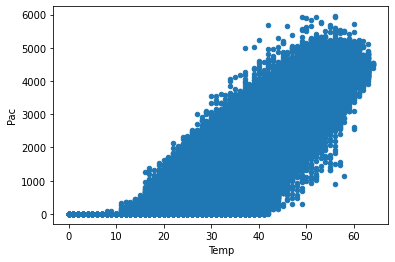

In [321]:
df_solar_panel.plot.scatter(x="Temp", y="Pac")

In [340]:
df_temp_pac = df_solar_panel.groupby("Temp").Pac.mean().reset_index()
df_temp_pac["e"] = df_solar_panel.groupby("Temp").Pac.std()
px.scatter(df_temp_pac, x="Temp", y="Pac", error_y="e"
            ,title="Correlazione temperatura / Pac",
            labels={"Pac": "Pac (W/H)", "Temp":"Temperatura superficie pannello (°C)"},
            template="plotly_white",
            color_discrete_sequence=["green"],
            height=700,
            width=1300)

In [342]:
df_temp_pac

,Temp,Pac,e
0,0,0.000799,0.051724
1,1,0.367347,0.635540
2,2,0.434783,0.583178
3,3,0.333333,0.606478
4,4,0.566667,0.727932
...,...,...,...
60,60,4313.076389,350.649449
61,61,4377.697674,274.812518
62,62,4356.983240,225.634349
63,63,4402.436620,252.329984


In [344]:
fig_pac = go.Figure(go.Scatter(
    x=df_temp_pac.index,
    y=df_temp_pac.Pac,
    #eventuale nuova modalità di rappresentazione
    #mode = 'markers',
    name='markers',
    line_color="blue",
    error_y=dict(
        type='data',
        symmetric=False,
        array = df_temp_pac['e'],
        arrayminus = df_temp_pac['e'],
        visible=True,
        color='#17BECF')
))
fig_pac.update_layout(
    title = 'Pac in base alla temperatura in media',
    xaxis_title = 'Temperatura',
    yaxis_title = 'Pac'
)
fig_pac.show()